  0%|          | 0/1149 [00:00<?, ?it/s]

  0%|          | 0/1068 [00:00<?, ?it/s]

  0%|          | 0/1028 [00:00<?, ?it/s]

  0%|          | 0/993 [00:00<?, ?it/s]

  0%|          | 0/1003 [00:00<?, ?it/s]

  0%|          | 0/776 [00:00<?, ?it/s]

  0%|          | 0/842 [00:00<?, ?it/s]

  0%|          | 0/738 [00:00<?, ?it/s]

  0%|          | 0/767 [00:00<?, ?it/s]

  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/996 [00:00<?, ?it/s]

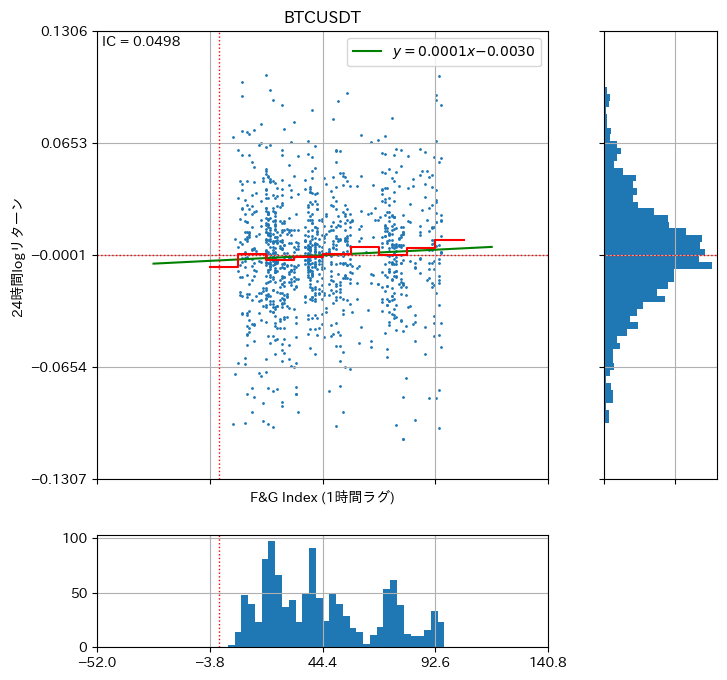

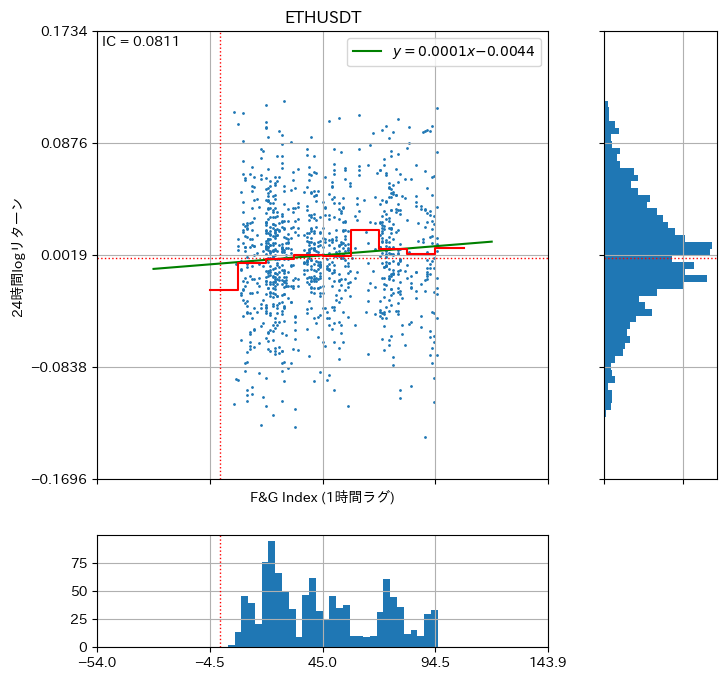

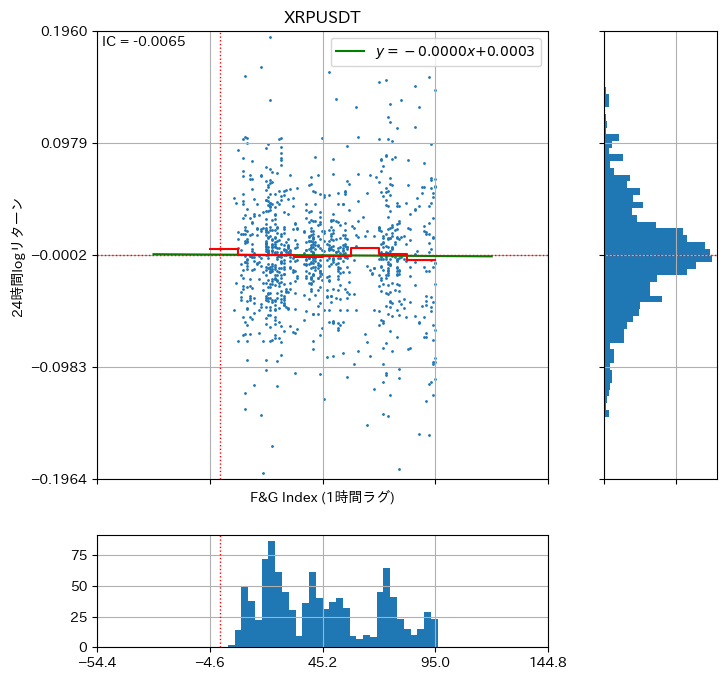

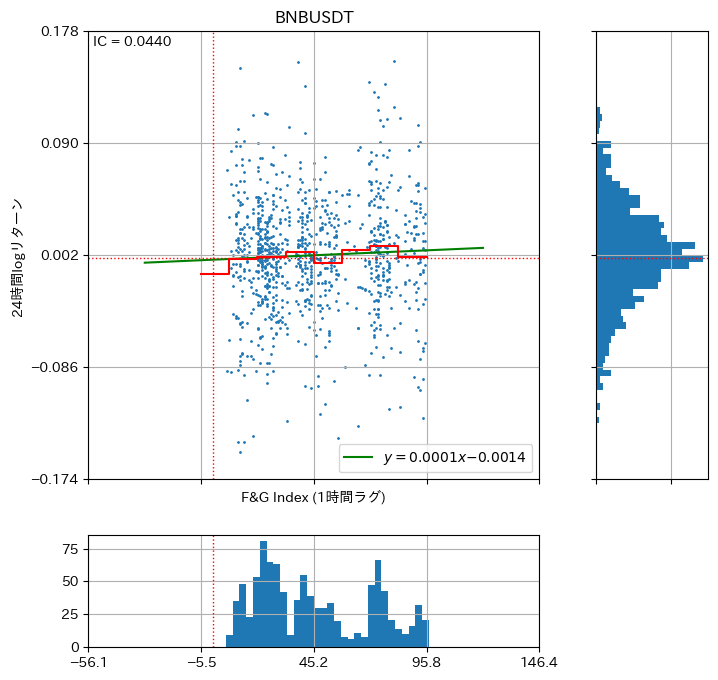

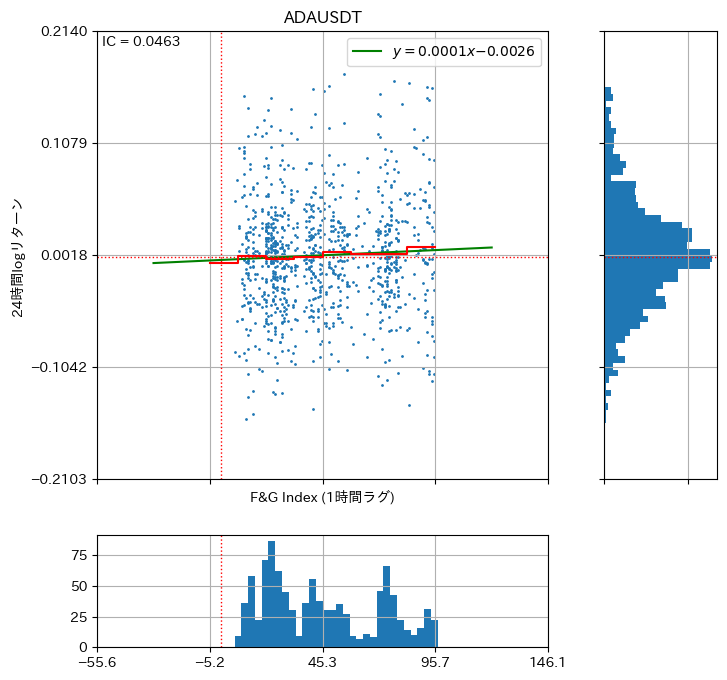

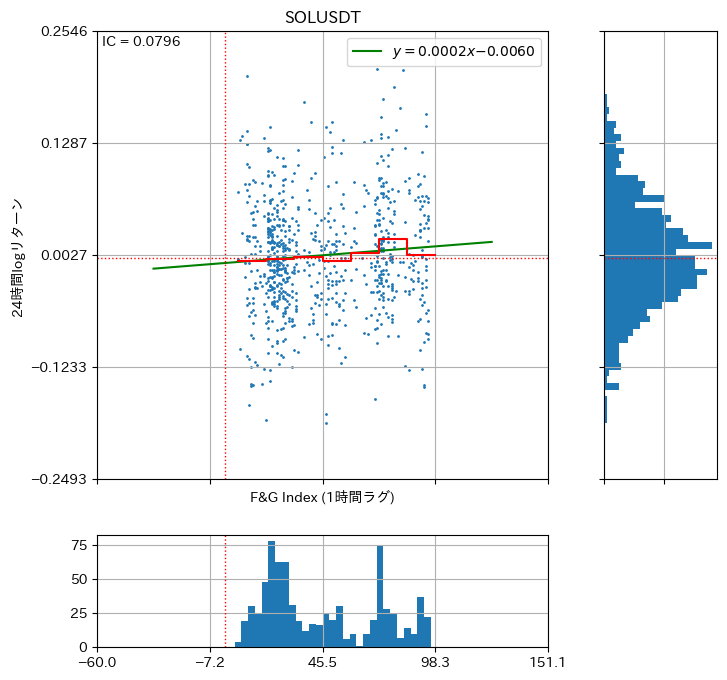

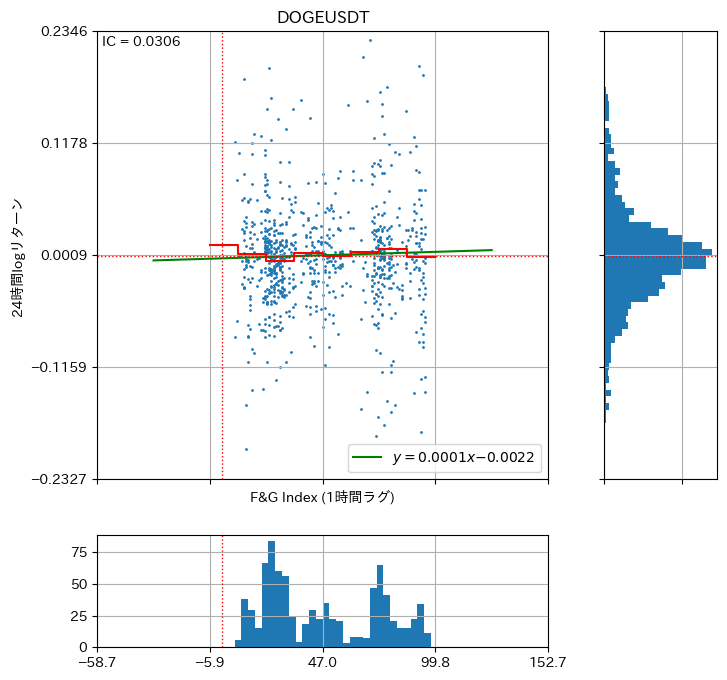

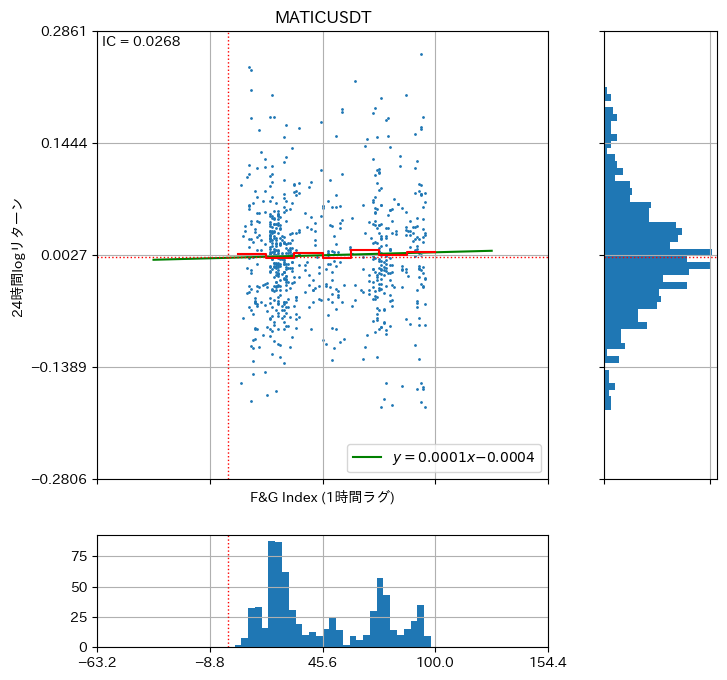

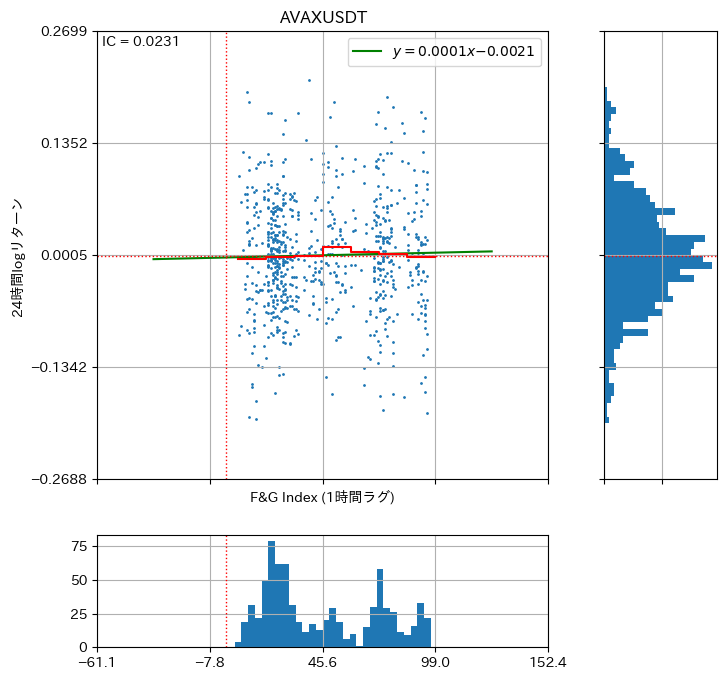

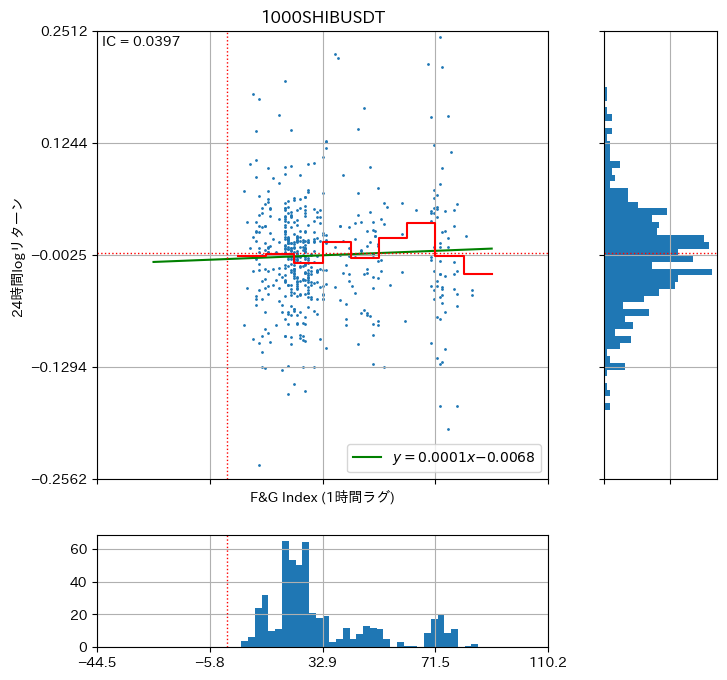

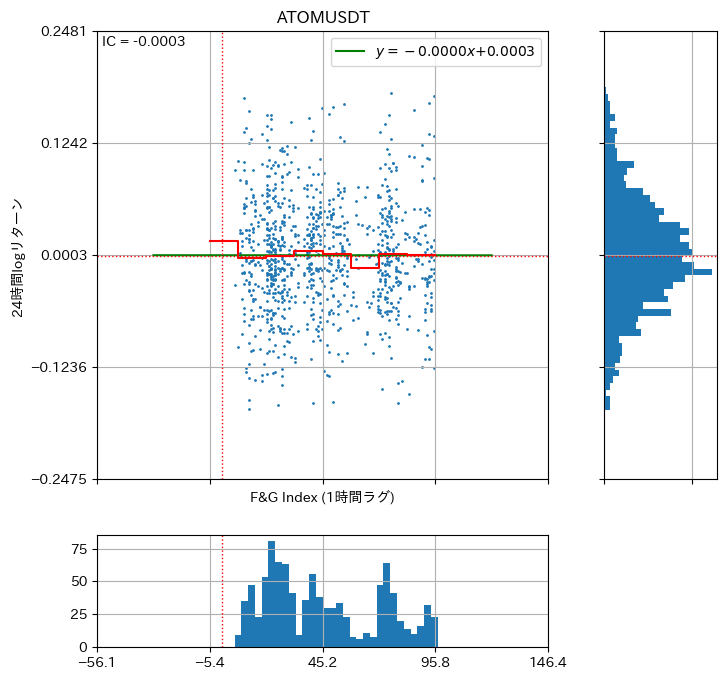

In [25]:
import exercise_util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# F&G Indexをロード (一日ごとのデータ)
df_fng = exercise_util.load_fng_file()

for _symbol in exercise_util.target_symbols.keys():
    # 1時間足をロードし、F&G Indexと結合する
    df_price = exercise_util.concat_timebar_files(_symbol, 60 * 60)
    df = pd.concat([df_fng, df_price], axis = 1).sort_index()
    df = df[['close', 'fng_value']]
    df['fng_value'] = df['fng_value'].ffill()
    df.dropna(inplace = True)

    # 24時間後のクローズとの対数リターンを求める
    df['lr'] =  np.log(df['close'].shift(-24)) - np.log(df['close'])

    # 対数リターンが異常値になっている行をドロップする。ICを求める時に異常値に引っ張られてしまうので。
    df.loc[(df['lr'] < df['lr'].quantile(0.01)) | (df['lr'] > df['lr'].quantile(0.99)), 'lr'] = np.nan
    df = df.dropna()

    # F&G Indexが発表された1時間後のデータのみを抜き出す
    df = df[['lr', 'fng_value']]
    df = df.loc[df.index.hour == 1]

    # 散布図の描画
    exercise_util.show_correlation(df['fng_value'], df['lr'], _symbol, 'F&G Index (1時間ラグ)', '24時間logリターン')